## *Used vehicles price prediction* Machine Learning Models Project
## <font size=5 color='gray'>Daniel Behar</font>
The aim of this Machine Learning Model exercise is to create a regression model that can predict the price of used cars. The dataset that I used came from UK.

#### Structure of the notebook:

## Importing Libraries

In [1]:
#General use libraries
import matplotlib as mpl 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#To split into train and test
from sklearn.model_selection import train_test_split

from math import sqrt

## Data
* Getting the data
* Extracting price from the train set (test doesn't have it)
* Creating train and test sets from de Train dataset

In [2]:
#Data will be the data that I'll use to create and train the model, datat is the data for which I want to predict the isFraud variable
data = pd.read_csv("train.csv")
datat = pd.read_csv("test.csv")

In [3]:
datat.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,make
0,A Class,2019,Automatic,1000,Diesel,145.0,56.5,2.0,mercedes
1,Yaris,2016,Manual,33965,Petrol,30.0,55.0,1.3,toyota
2,Touran,2019,Manual,12264,Diesel,145.0,51.4,1.6,vw
3,Astra,2017,Semi-Auto,11536,Petrol,125.0,51.4,1.4,vauxhall
4,Corsa,2019,Manual,5197,Petrol,145.0,43.5,1.4,vauxhall


Because I will not use pipelines, after cleaning the dataset I will separate it in train and test subsets

### Cleaning data:
* Searching for NA values and not normal observations
* Removing NAs from both datasets

How clean is the data

In [4]:
# % of NAs for each column
# Both datasets contains NAs in the same two variables

nas = pd.DataFrame(data.isna().sum()/data.shape[0], columns = ['%NAs']).reset_index()
nas
nas = pd.DataFrame(datat.isna().sum()/data.shape[0], columns = ['%NAs']).reset_index()
nas

,index,%NAs
0,model,0.000000
1,year,0.000000
2,transmission,0.000000
3,mileage,0.000000
4,fuelType,0.000000
5,tax,0.037169
6,mpg,0.037169
7,engineSize,0.000000
8,make,0.000000


In [5]:
# searching for strange values that might be a problem
def unique(column):
    return data[column].value_counts(), datat[column].value_counts()

unique("transmission")
unique("make")
unique("year")
unique("fuelType")

(Petrol      41763
 Diesel      31739
 Hybrid       2291
 Other         180
 Electric        5
 Name: fuelType, dtype: int64,
 Petrol      18112
 Diesel      13438
 Hybrid        938
 Other          73
 Electric        1
 Name: fuelType, dtype: int64)

One year in "data" dataset was 2060, so I'll erase all observations higher than 2023, the year I did this analysis. Datat didn't had any problem

In [6]:
data = data[data.year < 2023]

* Tax and mpg are continous variables and the % in both datasets is lower than 1%, so I'll impute with the mean in both variables
* None of the string variables have NAs nor atipical values

In [7]:
#Cleaning both datasets with mean

data["tax"] = data["tax"].fillna(data["tax"].mean())
data["mpg"] = data["mpg"].fillna(data["mpg"].mean())
datat["tax"] = datat["tax"].fillna(datat["tax"].mean())
datat["mpg"] = datat["mpg"].fillna(datat["mpg"].mean())

In [8]:
# % of NAs for each column
# Both datasets contains NAs in the same two variables

nas = pd.DataFrame(data.isna().sum()/data.shape[0], columns = ['%NAs']).reset_index()
nas
nas = pd.DataFrame(datat.isna().sum()/data.shape[0], columns = ['%NAs']).reset_index()
nas

,index,%NAs
0,model,0.0
1,year,0.0
2,transmission,0.0
3,mileage,0.0
4,fuelType,0.0
5,tax,0.0
6,mpg,0.0
7,engineSize,0.0
8,make,0.0


### Data behavior
* Extracting price from the Train set (Test doesn't have it)
* Creating train and test sets from the Train dataset

In [9]:
#Data train behavior
data.describe()

,year,mileage,tax,mpg,engineSize,price
count,75977.000000,75977.000000,75977.000000,75977.000000,75977.000000,75977.000000
mean,2017.099754,22967.203917,120.571147,55.194688,1.663715,16925.786830
std,2.122062,21024.550764,60.416360,15.738765,0.555868,9728.749634
min,1970.000000,1.000000,0.000000,0.300000,0.000000,450.000000
25%,2016.000000,7470.000000,120.571147,47.100000,1.200000,10277.000000
50%,2017.000000,17265.000000,145.000000,55.194688,1.600000,14750.000000
75%,2019.000000,32220.000000,145.000000,61.400000,2.000000,20980.000000
max,2020.000000,323000.000000,580.000000,470.800000,6.600000,149948.000000


In [10]:
#Data test behavior
datat.describe()

,year,mileage,tax,mpg,engineSize
count,32562.000000,32562.000000,32562.000000,32562.000000,32562.000000
mean,2017.092685,23161.974602,119.663394,55.102172,1.656818
std,2.135460,21525.931341,60.253088,14.675773,0.559808
min,1970.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,7506.000000,119.663394,47.100000,1.200000
50%,2017.000000,17263.500000,145.000000,55.102172,1.600000
75%,2019.000000,32292.250000,145.000000,61.400000,2.000000
max,2020.000000,300000.000000,580.000000,470.800000,6.600000


Amazingly, there are engines of size = 0, so thats a normal observation

C:\Users\danie\AppData\Local\Temp\ipykernel_15528\3451093991.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = data.corr(method='pearson')


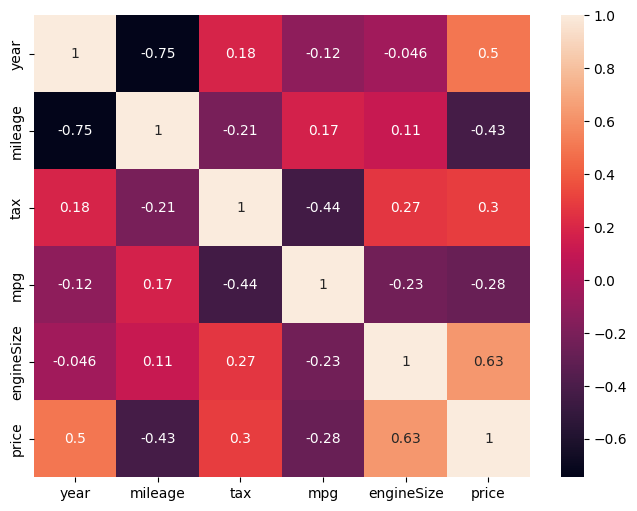

In [13]:
#Checking correlation between variables in order to avoid it

corr_df = data.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

<Figure size 640x480 with 0 Axes>

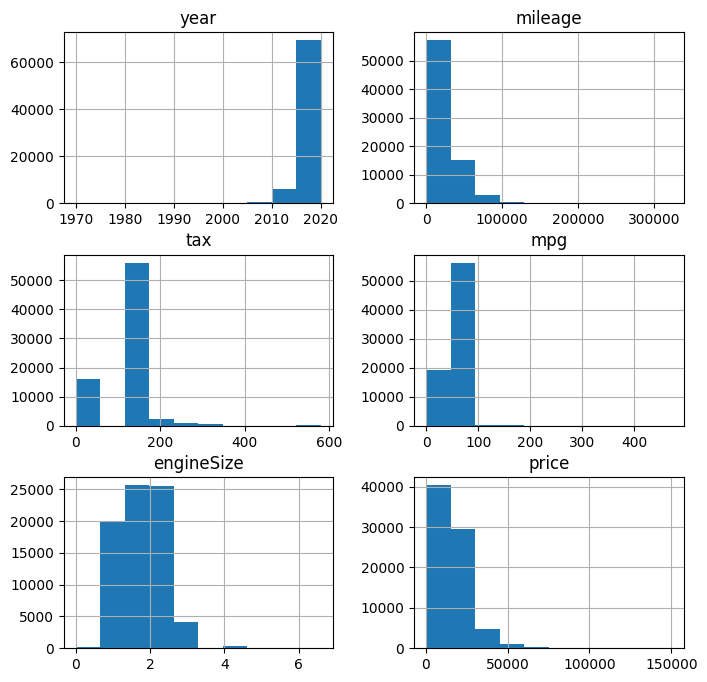

In [12]:
plt.figure()
data.hist(figsize=(8,8))
plt.show()

In [14]:
# Removing price variable from the train dataset
y = data.loc[:,"price"]
data.drop(["price"],axis=1,inplace=True)
print(data.shape)
print(y.shape)
print(datat.shape)

(75977, 9)
(75977,)
(32562, 9)


In [15]:
#Creating train and test variables
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=20)

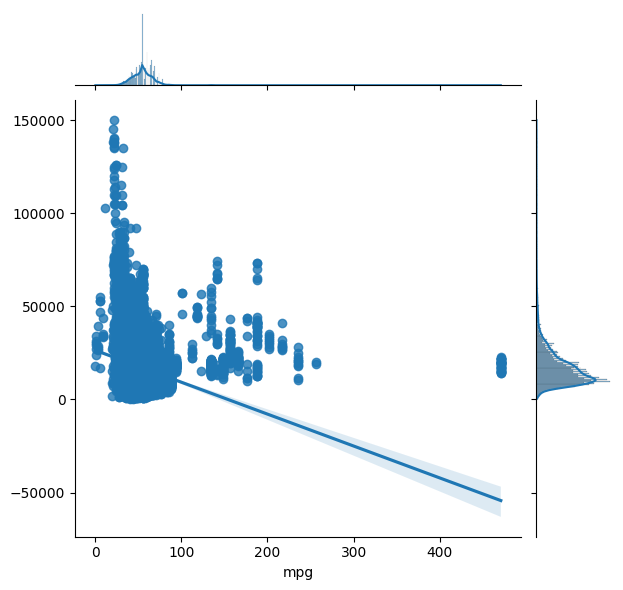

In [16]:
#Viewing if a linear regression could provide a good prediction. Apparently no
sns.jointplot(x=data['mpg'], y=y.values.ravel(), kind='reg')

## Preparing our data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_df, y, test_size=0.20, random_state=42)

In [15]:
X_train.shape

(353, 10)

In [16]:
X_test.shape

(89, 10)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr = LinearRegression()

lr.fit(X_train['bmi'].values.reshape(-1,1), y_train)

print('Coeficients')
print(lr.coef_)
print('Intercept')
print(lr.intercept_)

Coeficients
[[998.57768914]]
Intercept
[152.00335421]


## Simple linear regression with Statsmodels
- Recomended linear regression api due to useful summary output

In [19]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [20]:
# create instance of model 
X = sm.add_constant(X_train['bmi'])

# train
simple_model = sm.OLS(y_train, X)

simple_result = simple_model.fit()

In [21]:
print(simple_result.summary())

                            OLS Regression Results                            
Dep. Variable:                disease   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     202.4
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           1.40e-36
Time:                        13:32:51   Log-Likelihood:                -1958.2
No. Observations:                 353   AIC:                             3920.
Df Residuals:                     351   BIC:                             3928.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.0034      3.316     45.841      0.0

In [22]:
X_test['bmi']

287   -0.006206
211    0.036907
72    -0.004050
321    0.051996
73    -0.020218
         ...   
255   -0.065486
90    -0.025607
57    -0.063330
391   -0.069797
24     0.035829
Name: bmi, Length: 89, dtype: float64

In [23]:
y_pred_simple = simple_result.predict(sm.add_constant(X_test['bmi']))

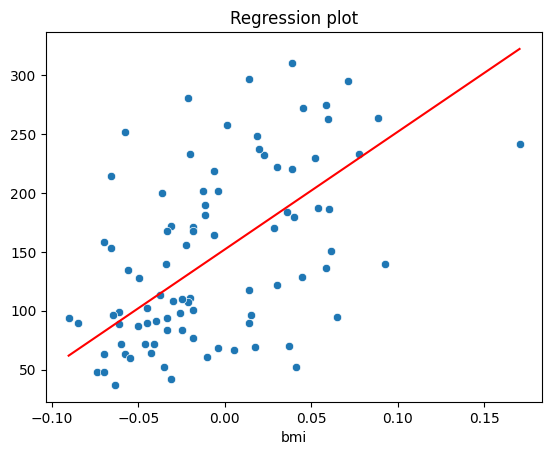

In [24]:
# plot prediction line

sns.scatterplot(x = X_test['bmi'], y = y_test.values.ravel())
sns.lineplot(x = X_test['bmi'] , y = y_pred_simple, color='r')
plt.title('Regression plot');

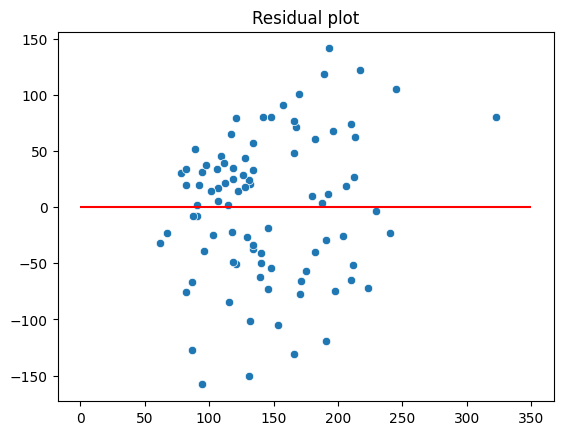

In [25]:
# plot residual plot to verify error behaviour
# y axis -> (y_predicted - y)
sns.scatterplot(x = y_pred_simple, y = (y_pred_simple - y_test.values.ravel()))
plt.hlines(y=0, xmin=0, xmax=350,color='r')
plt.title('Residual plot');

## Multiple linear regression

In [26]:
# create instance of model 
multiple_model = sm.OLS(y_train, sm.add_constant(X_train))

# train
multiple_result = multiple_model.fit()

print(multiple_result.summary())

                            OLS Regression Results                            
Dep. Variable:                disease   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     38.25
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           5.41e-50
Time:                        13:32:54   Log-Likelihood:                -1906.1
No. Observations:                 353   AIC:                             3834.
Df Residuals:                     342   BIC:                             3877.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        162.1473      4.208     38.530      0.0